# <center>A Report on Heart Disease Dataset</center>

## 1. Data Exploration

The heart disease dataset$^{[1]}$ contains 76 attributes of which a subset of 14 attributes has been used in our dataset. The target field contains 0s and 1s with 0 representing the absence of heart disease in a patient and 1 representing the presence of it.

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('data/Heart_train.csv')
test_df = pd.read_csv('data/Heart_test.csv')

In [3]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
1,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
2,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
3,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
4,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0


In [4]:
test_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
1,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
2,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
3,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
4,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1


In [5]:
train_df.shape

(242, 14)

In [6]:
test_df.shape

(61, 14)

Our dataset contains a total of **242 entries in the training set** and **61 entries in the testing set**. Each dataset has **14 features**.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
age         242 non-null int64
sex         242 non-null int64
cp          242 non-null int64
trestbps    242 non-null int64
chol        242 non-null int64
fbs         242 non-null int64
restecg     242 non-null int64
thalach     242 non-null int64
exang       242 non-null int64
oldpeak     242 non-null float64
slope       242 non-null int64
ca          242 non-null int64
thal        242 non-null int64
target      242 non-null int64
dtypes: float64(1), int64(13)
memory usage: 26.6 KB


A brief description of the attributes is tabulated below$^{[1]}$:

S.No.|Attribute|Description
-----|:--------|:----------
1.|age|Age in years
2.|sex|1 = male; 0 = female
3.|cp|Chest pain type<br><br>Value 1: typical angina<br>Value 2: atypical angina<br>Value 3: non-anginal pain<br>Value 4: asymptomatic
4.|trestbps|resting blood pressure
5.|chol|Serum cholestoral in mg/dl
6.|fbs|Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7.|restecg|Resting electrocardiographic results<br><br>Value 0: normal<br>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.|thalach|maximum heart rate achieved
9.|exang|Exercise induced angina (1 = yes; 0 = no)
10.|oldpeak|ST depression induced by exercise relative to rest
11.|slope|the slope of the peak exercise ST segment<br><br>Value 1: unsloping<br>Value 2: flat<br>Value 3: downsloping
12.|ca|Number of major vessels (0-3) colored by flourosopy
13.|thal|3 = normal; 6 = fixed defect; 7 = reversable defect
14.|target|diagnosis of heart disease (angiographic disease status)<br><br>Value 0: < 50% diameter narrowing<br>Value 1: > 50% diameter narrowing

**Renaming columns for clarity**

In [8]:
columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
              'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope', 'num_major_vessels', 'thal', 'target']
train_df.columns = columns
test_df.columns = columns

In [9]:
train_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,target
0,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
1,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
2,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
3,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
4,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0


### A brief background on the domain

Cardiovascular disease generally refers to conditions that involve narrowed or **blocked blood vessels** that can lead to a heart attack, **chest pain (angina)** or stroke.$^{[2]}$

Cardiovascular disease symptoms may be different for men and women. For instance, **men are more likely to have chest pain**; women are more likely to have other symptoms along with chest discomfort, such as shortness of breath, nausea and extreme fatigue.

Heart disease symptoms caused by **abnormal heartbeats**. Heart may beat too quickly, too slowly or irregularly.

•	**Aging increases your risk** of damaged and narrowed arteries and weakened or thickened heart muscle.<br>
•	**Men are generally at greater risk** of heart disease. However, **women's risk increases after menopause**.<br>
•	**Uncontrolled high blood pressure** can result in hardening and thickening of your arteries, narrowing the vessels through which blood flows.<br>
•	**High levels of cholesterol** in your blood can increase the risk of formation of plaques and atherosclerosis.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

**Blocked Blood Vessels**

In [11]:
train_df['num_major_vessels'].unique()

array([0, 3, 2, 1, 4])

In [12]:
def get_heart_disease_count_by_number_of_major_vessels(number_of_major_vessels):
    return len(train_df[(train_df['num_major_vessels'] == number_of_major_vessels) & (train_df['target'] == 1)])

In [13]:
patients_with_heart_disease_by_number_of_major_vessels = [get_heart_disease_count_by_number_of_major_vessels(i) for i in range(5)]
print(patients_with_heart_disease_by_number_of_major_vessels)

[102, 18, 6, 2, 4]


Text(0.5, 1.0, 'Patients with heart disease by number of major vessels')

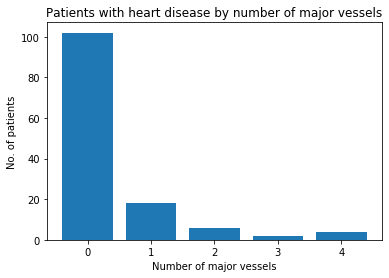

In [14]:
plt.bar(np.arange(5), [get_heart_disease_count_by_number_of_major_vessels(i) for i in range(5)])
plt.xlabel('Number of major vessels')
plt.ylabel('No. of patients')
plt.title('Patients with heart disease by number of major vessels')

Patients with only 2 or more major vessels are less prone to having a heart disease.

**Chest Pain**

In [15]:
train_df['chest_pain_type'].unique()

array([2, 3, 1, 0])

In [16]:
def get_chest_pain_type_by_sex(chest_pain_type, sex):
    return len(train_df[(train_df['chest_pain_type'] == chest_pain_type) & (train_df['sex'] == sex)])

cp_female = [get_chest_pain_type_by_sex(i,0) for i in range(4)]
cp_male = [get_chest_pain_type_by_sex(i,1) for i in range(4)]

In [17]:
print('Chest pains in female: ', cp_female)
print('Chest pains in male: ', cp_male)

Chest pains in female:  [28, 14, 29, 4]
Chest pains in male:  [80, 24, 49, 14]


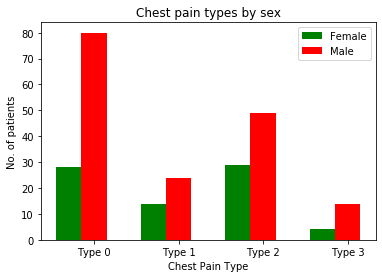

In [18]:
x_pos = np.arange(4)
bar_width = 0.3

rects1 = plt.bar(x_pos, cp_female, bar_width, color='g', label='Female')
rects2 = plt.bar(x_pos + bar_width, cp_male, bar_width, color='r', label='Male')

plt.xlabel('Chest Pain Type')
plt.ylabel('No. of patients')
plt.title('Chest pain types by sex')
plt.xticks(x_pos + bar_width, ['Type 0', 'Type 1', 'Type 2', 'Type 3'])
plt.legend()

plt.show()

Men have more chest pain than women. Type 0 and Type 2 are more common than other types of chest pain.

### Pandas Profiling

In [19]:
from pandas_profiling import ProfileReport

In [20]:
profile = ProfileReport(train_df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [21]:
profile.to_widgets()

There is a duplicate entry in the training data.

In [22]:
duplicate_rows_df = train_df[train_df.duplicated(keep=False)]
duplicate_rows_df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,target
98,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
144,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [23]:
train_df.drop(144, inplace=True)
train_df.shape

(241, 14)

Since it is not common for two patients to have the exact same value for all of the attributes, this is considered as a duplicate entry for the same patient and hence **one row is dropped from the dataset**.

In [24]:
import seaborn as sns
sns.set_style("darkgrid")

In [25]:
def scatter_plot(df, nrows, ncols, figsize, xlabel, ylabels, huelabel):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    plt.suptitle('Plotting ' + xlabel + ' against ' + ', '.join(ylabels))
    for i in range(nrows):
        for j in range(ncols):
            sns.scatterplot(df[xlabel], df[ylabels[(i*ncols)+j]], hue=df[huelabel], ax=axes[i,j] if nrows > 1 else axes[j])

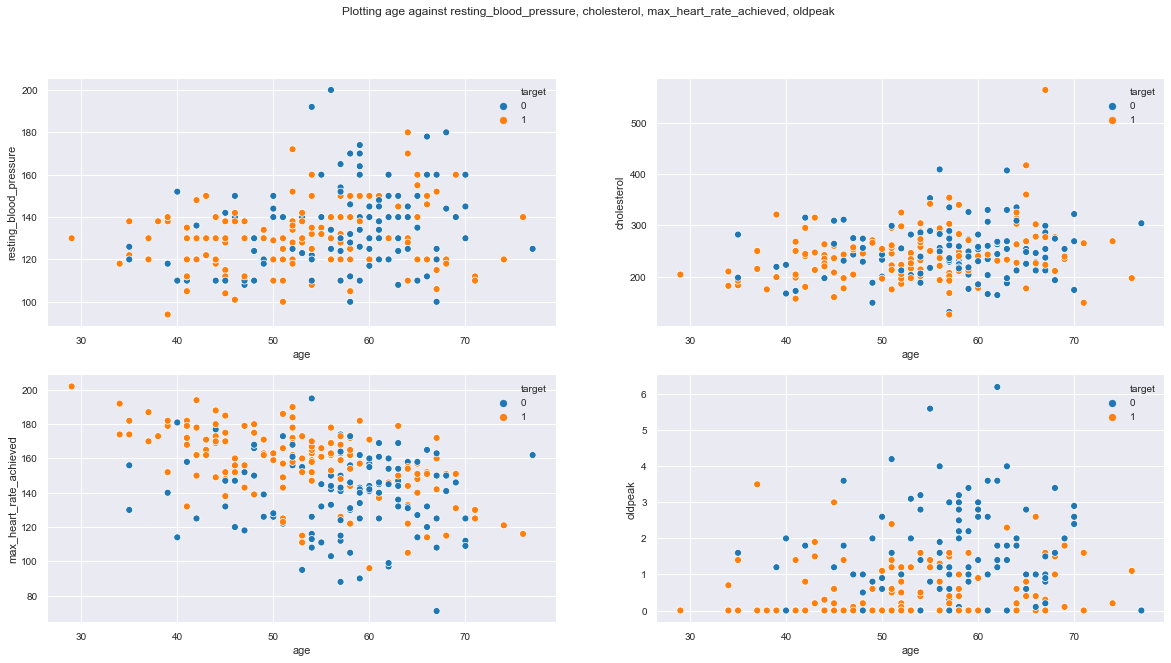

In [26]:
scatter_plot(train_df, 2, 2, (20,10), 'age', ['resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'oldpeak'], 'target')


There are patients from all age groups that have heart disease. Patients with very high heart rate are more likely to have heart disease. 

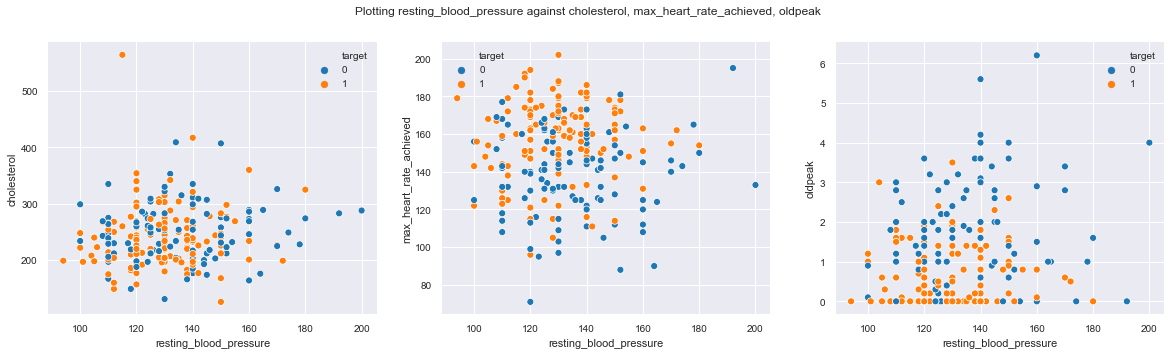

In [27]:
scatter_plot(train_df, 1, 3, (20,5), 'resting_blood_pressure', ['cholesterol', 'max_heart_rate_achieved', 'oldpeak'], 'target')

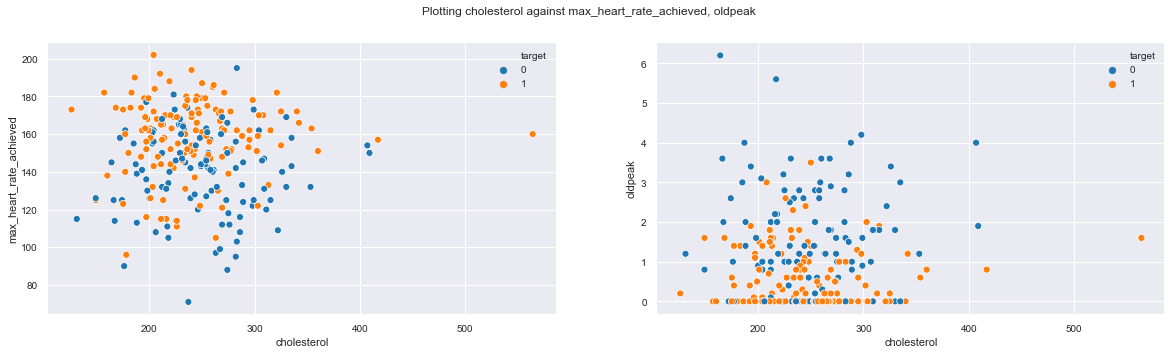

In [28]:
scatter_plot(train_df, 1, 2, (20,5), 'cholesterol', ['max_heart_rate_achieved', 'oldpeak'], 'target')

Text(0.5, 1.0, 'Plotting oldpeak against max_heart_rate_achieved')

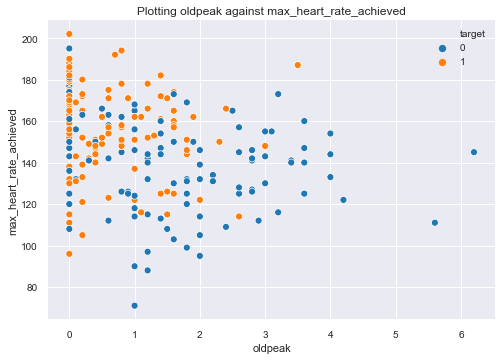

In [29]:
sns.scatterplot(train_df['oldpeak'], train_df['max_heart_rate_achieved'], hue=train_df['target'])
plt.title('Plotting oldpeak against max_heart_rate_achieved')

## 2. Feature Extraction

Categorical| Non-categorical
-----------|----------------
chest_pain_type|age (Numerical)
rest_ecg|resting_blood_pressure (Numerical)     
slope|cholesterol (Numerical)
thal|max_heart_rate_achieved (Numerical)
|oldpeak (Numerical)
|num_major_vessels (Numerical)
|sex (Boolean)
|fasting_blood_sugar (Boolean)
|exercise_induced_angina (Boolean)

In [30]:
X_train = train_df.drop(columns='target')
y_train = train_df['target']

In [31]:
X_test = test_df.drop(columns='target')
y_test = test_df['target']

### One Hot Encoding

In [32]:
categorical_columns = ['chest_pain_type', 'rest_ecg', 'slope', 'thal']
non_categorical_columns = [c for c in X_train.columns if c not in categorical_columns]

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train[categorical_columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [35]:
column_names = encoder.get_feature_names(input_features=categorical_columns)
column_names

array(['chest_pain_type_0', 'chest_pain_type_1', 'chest_pain_type_2',
       'chest_pain_type_3', 'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2',
       'slope_0', 'slope_1', 'slope_2', 'thal_0', 'thal_1', 'thal_2',
       'thal_3'], dtype=object)

In [36]:
def encode_dataframe(df, column_names, index):
    category_encoded = encoder.transform(df[categorical_columns])
    category_encoded_df = pd.DataFrame(category_encoded.todense(), columns=column_names, index=index)
    return pd.concat([df[non_categorical_columns], category_encoded_df], axis=1)

In [37]:
X_train_encoded = encode_dataframe(X_train, column_names, X_train.index)
X_train_encoded.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,oldpeak,num_major_vessels,chest_pain_type_0,...,rest_ecg_0,rest_ecg_1,rest_ecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,67,1,152,212,0,150,0,0.8,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,53,1,130,246,1,173,0,0.0,3,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,61,1,134,234,0,145,0,2.6,2,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,45,1,128,308,0,170,0,0.0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,50,1,144,200,0,126,1,0.9,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [38]:
X_test_encoded = encode_dataframe(X_test, column_names, X_test.index)
X_test_encoded.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,oldpeak,num_major_vessels,chest_pain_type_0,...,rest_ecg_0,rest_ecg_1,rest_ecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,58,1,120,284,0,160,0,1.8,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,52,1,112,230,0,160,0,0.0,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42,0,120,209,0,173,0,0.0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,55,1,130,262,0,155,0,0.0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,53,0,130,264,0,143,0,0.4,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
import pickle
from pathlib import Path

In [49]:
def pickle_exists(filename):
    file = Path('models/' + filename + '.pkl')
    if file.is_file():
        return True
    return False

def save_model(model, filename):
    pickle.dump(model, open('models/' + filename + '.pkl', 'wb'))
    
def load_model(filename):
    return pickle.load(open('models/' + filename + '.pkl', 'rb'))

In [41]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [42]:
def get_summary_of_model(model, x_test, y_test):
    y_predictions = model.predict(x_test)
    return accuracy_score(y_test, y_predictions)

In [46]:
def grid_search_classifier(classifier, x_train, y_train, x_test, y_test, grid_params):
    clf = GridSearchCV(classifier(random_state=1), grid_params, scoring='accuracy')
    clf.fit(x_train, y_train)
    best_model = classifier(**clf.best_params_)
    best_model.fit(x_train, y_train)
    return best_model, get_summary_of_model(best_model, x_test, y_test)

In [47]:
classifiers = [
    (SVC, 
     {
         'kernel':('linear', 'rbf', 'sigmoid'), 
         'C':(1, 5, 10), 
         'decision_function_shape':('ovo','ovr')
     },
    'svm'),
    (DecisionTreeClassifier, 
     {
         'max_depth': (3,5,9),
         'min_samples_split': (2,6,10)
     },
    'decision_tree'),
    (RandomForestClassifier, 
     {
         'max_depth': (3,5,9),
         'min_samples_split': (2,6,10)
     },
    'random_forest'),
    (ExtraTreesClassifier, 
     {
         'max_depth': (3,5,9),
         'min_samples_split': (2,6,10)
     },
     'extra_trees'
    ),
    (AdaBoostClassifier, 
     {
         'n_estimators': (5,10,20)
     },
     'ada_boost'),
    (GradientBoostingClassifier, 
     {
         'n_estimators': (5,10,20),
         'min_samples_split': (2,6,10)
     },
    'gradient_boosting'),
]

In [51]:
summary = []
for classifier, grid_params, filename in classifiers:
    if pickle_exists(filename):
        print('\nPickle already exists for ' + classifier.__name__ + '. Loading from file...')
        model = load_model(filename)
        accuracy = get_summary_of_model(model, X_test_encoded, y_test)
    else:
        print('\nNo pickle found for ' + classifier.__name__ + '. Training model and saving to file...')
        model, accuracy = grid_search_classifier(classifier, X_train_encoded, y_train, 
                                                 X_test_encoded, y_test, grid_params)
        save_model(model, filename)
    summary.append({'Classifier': classifier.__name__, 'Accuracy': accuracy})
    
pd.DataFrame(summary)


Pickle already exists for SVC. Loading from file...

Pickle already exists for DecisionTreeClassifier. Loading from file...

Pickle already exists for RandomForestClassifier. Loading from file...

Pickle already exists for ExtraTreesClassifier. Loading from file...

Pickle already exists for AdaBoostClassifier. Loading from file...

Pickle already exists for GradientBoostingClassifier. Loading from file...


,Classifier,Accuracy
0,SVC,0.852459
1,DecisionTreeClassifier,0.819672
2,RandomForestClassifier,0.819672
3,ExtraTreesClassifier,0.803279
4,AdaBoostClassifier,0.836066
5,GradientBoostingClassifier,0.819672


## References

1. https://archive.ics.uci.edu/ml/datasets/Heart+Disease
2. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118